In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drug200.csv')

<Axes: >

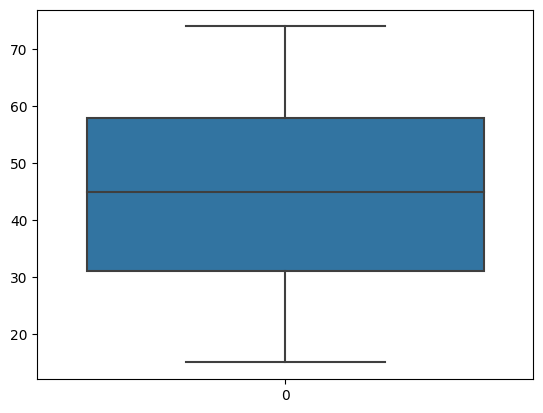

In [ ]:
#checking for outliers in age feature
sns.boxplot(df['Age'])

<Axes: >

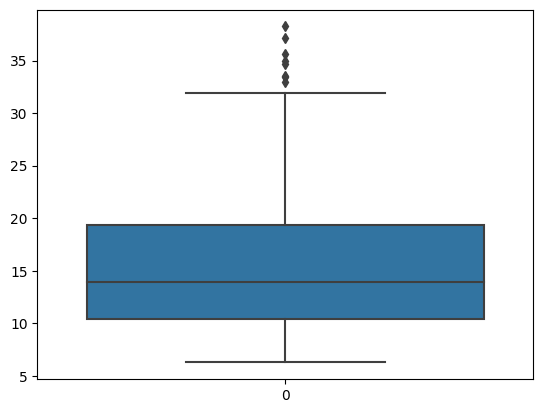

In [ ]:
#checking for outliers in Na_to_K feature
sns.boxplot(df['Na_to_K'])

In [ ]:
#we can observe that there are outliers present in Na_to_K feature
#so we have to remove those outliers using IQR method
q1=df.Na_to_K.quantile(.25)
q3=df.Na_to_K.quantile(.75)

In [ ]:
q1

10.4455

In [ ]:
q3

19.38

In [ ]:
IQR=q3-q1
IQR

8.9345

In [ ]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [ ]:
df = df[df.Na_to_K<upper_limit]

<Axes: >

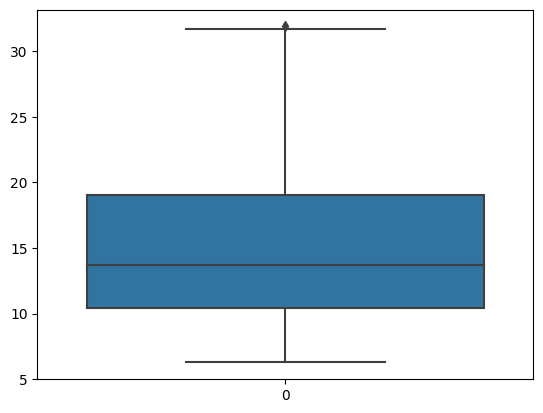

In [ ]:
sns.boxplot(df['Na_to_K'])

In [ ]:
#in the above plot, we can observe that there are still outliers present
# so we are performing the process again inorder to remove them
q1=df.Na_to_K.quantile(.25)
q3=df.Na_to_K.quantile(.75)

In [ ]:
IQR=q3-q1
IQR

8.575000000000003

In [ ]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [ ]:
df = df[df.Na_to_K<upper_limit]

<Axes: >

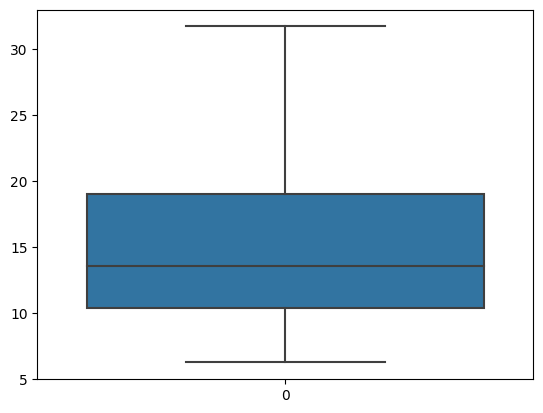

In [ ]:
sns.boxplot(df['Na_to_K'])

In [ ]:
#we can observe in the above plot that all the outliers have been removed 

In [ ]:
x.shape,y.shape

((191, 5), (191, 5))

In [ ]:
x = df.iloc[:,0:5] # iloc[:,:]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25
1,47,M,LOW,HIGH,13
2,47,M,LOW,HIGH,10
3,28,F,NORMAL,HIGH,7
4,61,F,LOW,HIGH,18
...,...,...,...,...,...
195,56,F,LOW,HIGH,11
196,16,M,LOW,HIGH,12
197,52,M,NORMAL,HIGH,9
198,23,M,NORMAL,NORMAL,14


In [ ]:
y = df.iloc[:,5]
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 191, dtype: object

In [ ]:
#splitting the data into training data and testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)

In [ ]:
x.shape,y.shape

((191, 5), (191,))

In [ ]:
xtrain.shape,xtest.shape

((133, 5), (58, 5))

In [ ]:
ytrain.shape,ytest.shape

((133,), (58,))

In [ ]:
#performing encoding
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
xtrain['Sex'] = le.fit_transform(xtrain['Sex'])
xtrain['BP'] = le.fit_transform(xtrain['BP'])
xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtrain['Na_to_K'] = xtrain['Na_to_K'].astype('int')
xtrain

,Age,Sex,BP,Cholesterol,Na_to_K
157,53,1,1,0,22
17,43,1,0,0,13
16,69,1,1,1,11
52,62,1,1,1,27
87,69,1,1,0,15
...,...,...,...,...,...
3,28,0,2,0,7
136,55,0,0,0,10
140,49,1,0,1,6
161,57,0,0,1,9


In [ ]:
xtest['Sex'] = le.fit_transform(xtest['Sex'])
xtest['BP'] = le.fit_transform(xtest['BP'])
xtest['Cholesterol'] = le.fit_transform(xtest['Cholesterol'])
xtest['Na_to_K'] = xtest['Na_to_K'].astype('int')
xtest

,Age,Sex,BP,Cholesterol,Na_to_K
64,60,0,0,0,13
11,34,0,0,1,19
178,39,1,2,0,15
88,37,0,0,1,23
151,68,1,0,0,11
97,56,0,0,0,25
21,63,1,2,0,25
68,54,1,2,0,24
23,48,0,1,0,15
63,45,1,1,1,8


In [ ]:
xtrain.shape,xtest.shape

((133, 5), (58, 5))

In [ ]:
ytrain.shape,ytest.shape

((133,), (58,))

In [ ]:
#building ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#Building classification model
#initialsing sequential layer
classifier=Sequential()

In [ ]:
#adding the input layer
#as we are having 5 columns
classifier.add(Dense(4,activation='relu'))

In [ ]:
#adding the first hidden layer
classifier.add(Dense(64,activation='relu'))
#adding the second hidden layer
classifier.add(Dense(32,activation='relu'))
#adding the third hidden layer
classifier.add(Dense(16,activation='relu'))
#adding the output layer
#as there are 5 classes in drug
classifier.add(Dense(1,activation='softmax'))

In [ ]:
#accuracy-in op u can check accuracy also
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 4)                 24        
                                                                 
 dense_64 (Dense)            (None, 64)                320       
                                                                 
 dense_65 (Dense)            (None, 32)                2080      
                                                                 
 dense_66 (Dense)            (None, 16)                528       
                                                                 
 dense_67 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,969
Trainable params: 2,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.fit(xtrain,ytrain,epochs=10,batch_size=5,validation_data=(xtest,ytest))

Epoch 1/10


UnimplementedError: ignored